# <font color=#025dfa> Predict house pricing using advanced regression

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
warnings.filterwarnings('ignore') 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
pd.set_option('display.max_columns', None) #verileri genişletmeye yarıyor
pd.set_option('display.max_rows', None)

In [5]:
df1=pd.read_csv('train.csv')

In [6]:
df2=pd.read_csv('test.csv')

In [7]:
df1.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df2.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
df=pd.concat([df1,df2])

## <font color=#d707f2> EDA Exploratory Data Analsis

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [14]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1047,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686.0,Unf,0.0,304.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,0.0,1.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2.0,672.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,145000.0
1359,2820,20,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,799.0,Unf,0.0,168.0,967.0,GasA,Ex,Y,SBrkr,1350,0,0,1350,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1954.0,RFn,2.0,504.0,TA,TA,Y,237,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
743,744,80,RL,70.0,12886,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1963,1999,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,444.0,Unf,0.0,76.0,520.0,GasA,Ex,Y,SBrkr,1464,0,0,1464,0.0,1.0,2,0,3,1,TA,6,Min2,1,TA,Attchd,1997.0,RFn,2.0,480.0,TA,TA,Y,302,0,0,0,100,0,NaN,NaN,NaN,0,10,2009,WD,Normal,175000.0
185,1646,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1974,Hip,CompShg,Plywood,Plywood,BrkFace,196.0,TA,TA,CBlock,TA,TA,No,ALQ,888.0,Unf,0.0,228.0,1116.0,GasA,Ex,Y,SBrkr,1116,0,0,1116,1.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1974.0,RFn,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,4,2009,WD,Normal,NaN
525,1986,120,RM,NaN,3940,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,24.0,Gd,TA,PConc,Gd,TA,No,GLQ,1087.0,Unf,0.0,306.0,1393.0,GasA,Ex,Y,SBrkr,1576,0,0,1576,1.0,0.0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2004.0,RFn,3.0,668.0,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,NaN


In [15]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [16]:
df.shape

(2919, 81)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LandContour    2919 non-null   int64  
 5   Utilities      2919 non-null   int64  
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   int64  
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   int64  
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  Exterior1st    2919 non-null   object 
 17  Exterior2nd    2919 non-null   object 
 18  MasVnrType   

In [18]:
2919*80//100

2335

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
KitchenQual         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
TotRmsAbvGrd        0
PoolArea            0
3SsnPorch           0
ScreenPorch         0
EnclosedPorch       0
OpenPorchS

In [21]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.026666,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,

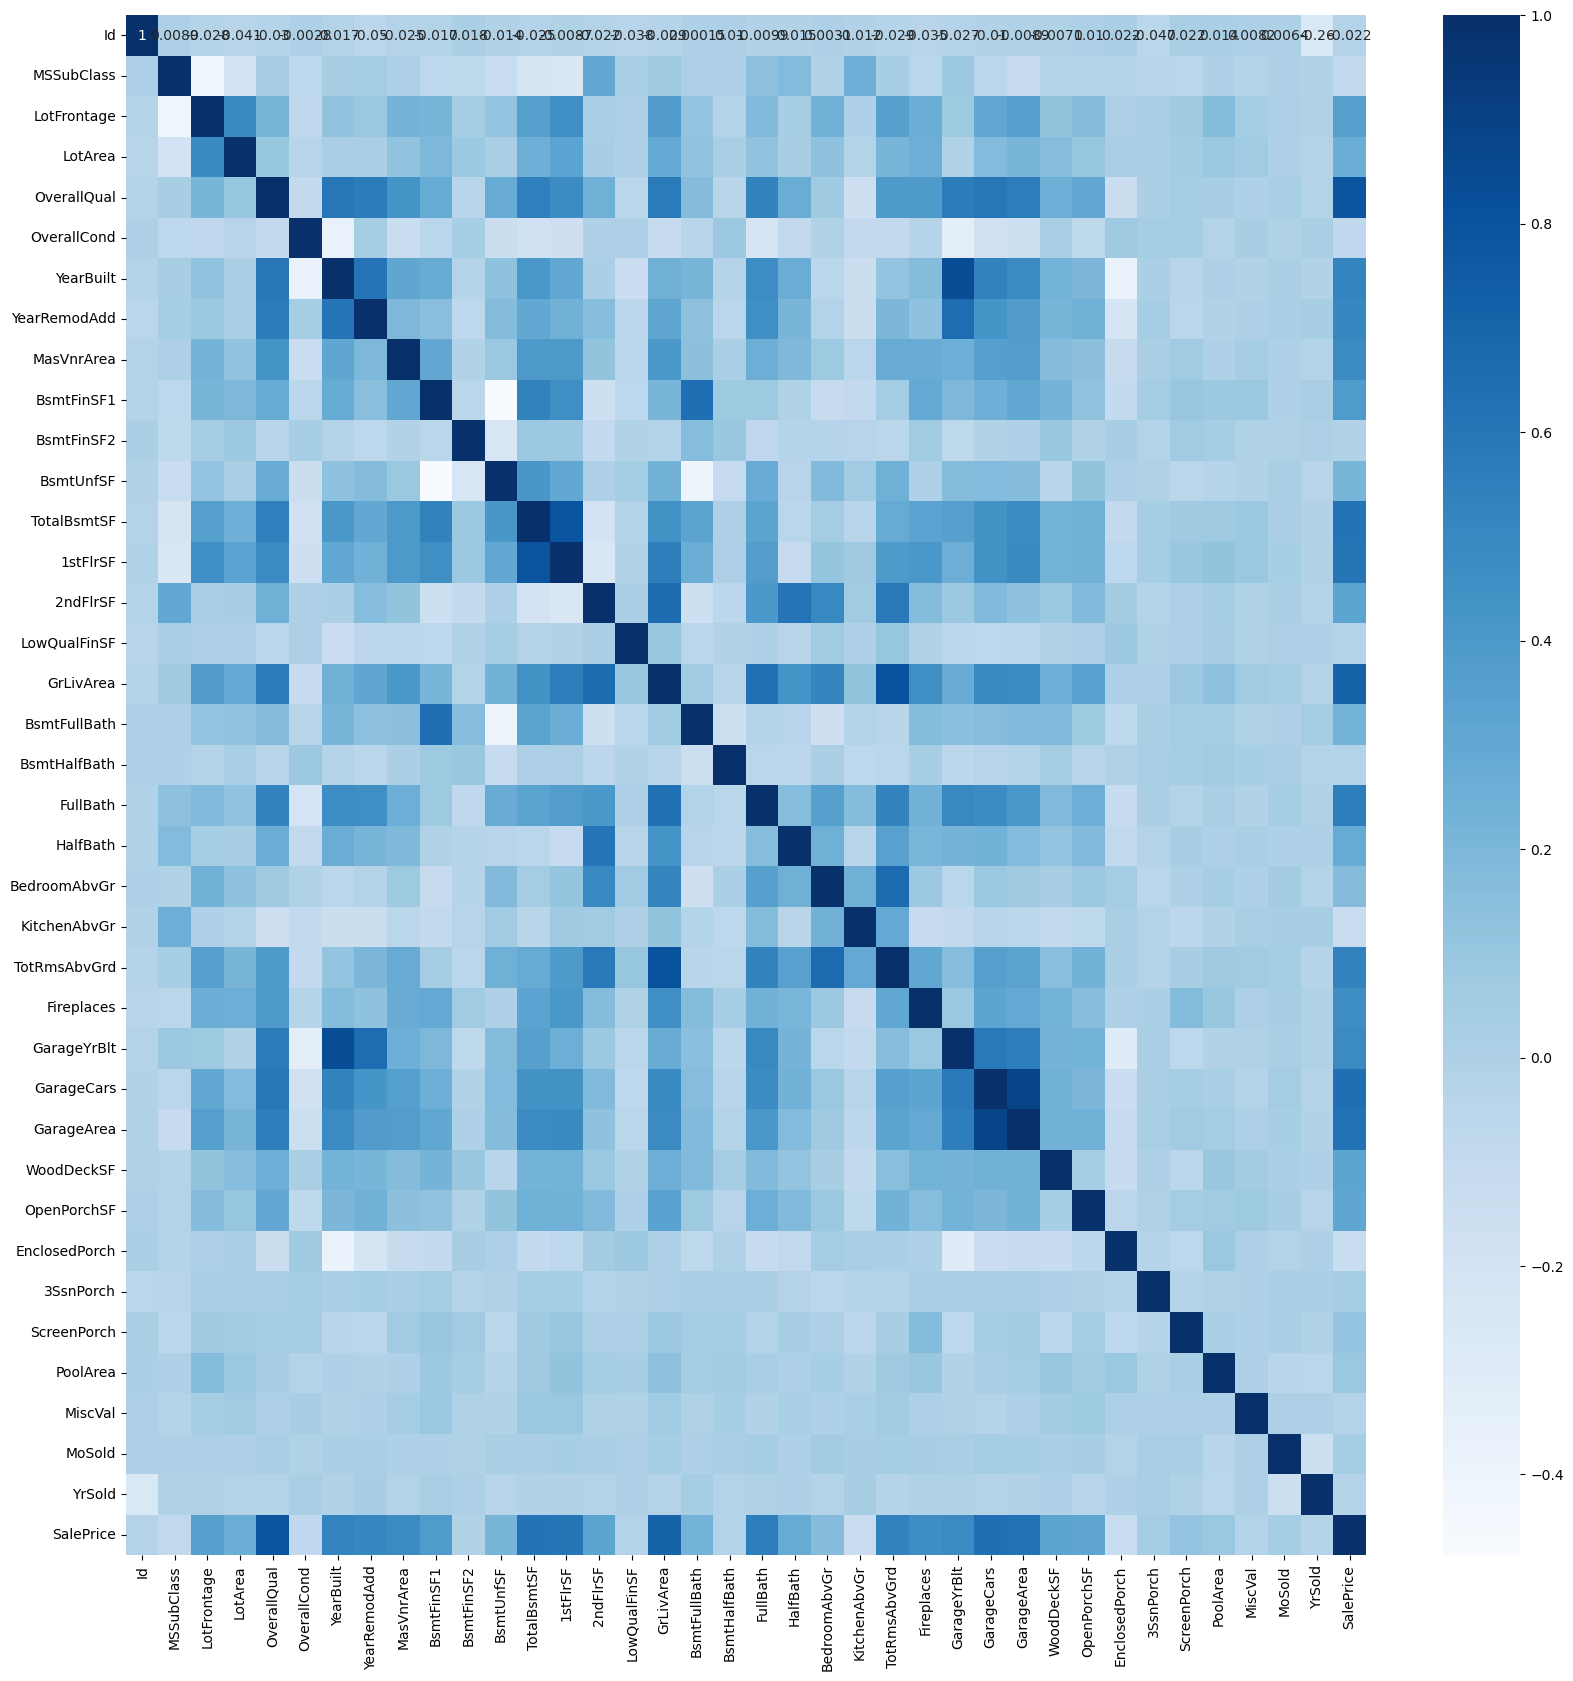

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [23]:
abs(df.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

### <font color=#9e32a8> Gereksiz Verileri Silme İşlemi Yapıyoruz

In [25]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
df=df.drop(['Id','MSSubClass','LotShape','BsmtFinType1','HouseStyle','RoofStyle','RoofMatl',
            'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType1', 'BsmtFinSF1',
            'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','BsmtHalfBath','FireplaceQu',
            'GarageType', 'GarageFinish','3SsnPorch','PoolQC','MiscFeature','MiscVal',
            'MoSold','YrSold', 'SaleType','SaleCondition','Alley','Fence'],axis=1)#sondaki 'Alley','Fence' %80 fazlası boştu o yüzden kaldırdım
df.head(1)

,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,RL,65.0,8450,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,2,1,3,1,Gd,8,Typ,0,2003.0,2.0,548.0,TA,TA,Y,0,61,0,0,0,208500.0


## <font color=#e82709> Feature Engineering

### <font color='#0975e8'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzetmaye Başladık

In [29]:
df.isnull().sum().sort_values(ascending=False)

MasVnrType       1766
SalePrice        1459
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
BsmtCond           82
BsmtQual           81
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
Functional          2
Utilities           2
GarageArea          1
TotalBsmtSF         1
KitchenQual         1
Exterior1st         1
Exterior2nd         1
Electrical          1
GarageCars          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
LandContour         0
Condition2          0
HalfBath            0
Street              0
LotArea             0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
ScreenPorch         0
PoolArea            0
BedroomAbvGr        0
GrLivArea           0
FullBath            0
BldgType            0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
Condition1          0
Neighborhood        0
ExterQual           0
ExterCond 

sns.countplot(x=df[])
plt.xticks(rotation=90);

df[].value_counts().plot.pie(autopct='%1.1f%%',explode=[,,,]);

sns.distplot(x=df[])
plt.xticks(rotation=90);

sns.histplot(x=df[]);

sns.boxplot(x='',y='',data=df);
plt.xticks(rotation=90);

In [31]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
0,RL,65.0,8450,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,2,1,3,1,Gd,8,Typ,0,2003.0,2.0,548.0,TA,TA,Y,0,61,0,0,0,208500.0
1,RL,80.0,9600,Pave,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,1976,MetalSd,MetalSd,NaN,0.0,TA,TA,Gd,TA,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,2,0,3,1,TA,6,Typ,1,1976.0,2.0,460.0,TA,TA,Y,298,0,0,0,0,181500.0
2,RL,68.0,11250,Pave,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Gd,TA,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,2,1,3,1,Gd,6,Typ,1,2001.0,2.0,608.0,TA,TA,Y,0,42,0,0,0,223500.0
3,RL,60.0,9550,Pave,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1915,1970,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,TA,Gd,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,1,0,3,1,Gd,7,Typ,1,1998.0,3.0,642.0,TA,TA,Y,0,35,272,0,0,140000.0
4,RL,84.0,14260,Pave,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Gd,TA,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,2,1,4,1,Gd,9,Typ,1,2000.0,3.0,836.0,TA,TA,Y,192,84,0,0,0,250000.0


In [32]:
df.isnull().sum().sort_values(ascending=False)

MasVnrType       1766
SalePrice        1459
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
BsmtCond           82
BsmtQual           81
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
Functional          2
Utilities           2
GarageArea          1
TotalBsmtSF         1
KitchenQual         1
Exterior1st         1
Exterior2nd         1
Electrical          1
GarageCars          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
LandContour         0
Condition2          0
HalfBath            0
Street              0
LotArea             0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
ScreenPorch         0
PoolArea            0
BedroomAbvGr        0
GrLivArea           0
FullBath            0
BldgType            0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
Condition1          0
Neighborhood        0
ExterQual           0
ExterCond 

#### <font color=#2da6f7> Date ile İlgileniyoruz

In [34]:
df['YearBuilt']=datetime.datetime.now().year-df['YearBuilt']
df['YearRemodAdd']=datetime.datetime.now().year-df['YearRemodAdd']
df['GarageYrBlt']=datetime.datetime.now().year-df['GarageYrBlt']

#### <font color=#2da6f7> MasVnrType ile İlgileniyoruz

In [36]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [37]:
df['MasVnrType']=df['MasVnrType'].fillna('None')

<Axes: xlabel='MasVnrType', ylabel='count'>

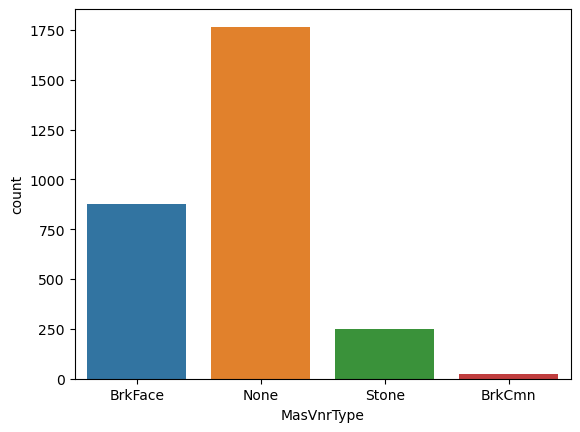

In [38]:
sns.countplot(x=df['MasVnrType'])

In [39]:
df['MasVnrType']=df['MasVnrType'].replace(['Stone','BrkFace','BrkCmn','None'],[3,2,1,0])

#### <font color=#2da6f7> LotFrontage ile İlgileniyoruz

In [41]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
90.0      46
78.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
79.0      28
100.0     28
82.0      28
52.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
55.0      24
53.0      24
43.0      23
88.0      22
67.0      22
69.0      20
35.0      19
71.0      19
56.0      19
44.0      19
84.0      18
81.0      18
58.0      17
61.0      17
48.0      16
40.0      16
34.0      16
86.0      15
92.0      15
95.0      15
110.0     15
77.0      15
41.0      14
120.0     14
91.0      14
96.0      14
83.0      13
93.0      13
94.0      12
42.0      12
105.0     12
98.0      12
87.0      11
107.0     11
30.0      11
54.0      10
45.0      10
89.0      10
102.0     10
47.0       8
36.0       8
32.0       8
37.0       7
39.0       6
99.0       6
103.0      6
108.0      6
114.0      5
104.0      5


In [42]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

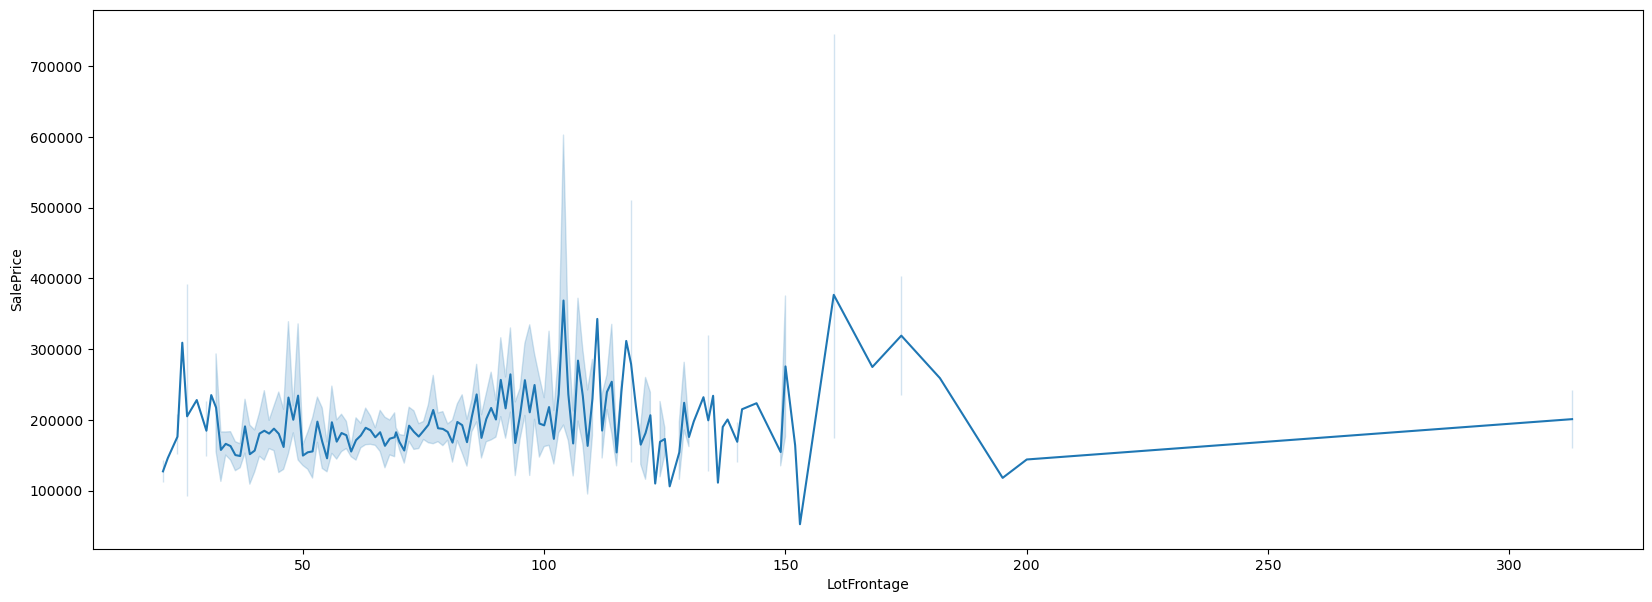

In [43]:
plt.figure(figsize=(20,7))
sns.lineplot(x='LotFrontage',y='SalePrice',data=df);

In [44]:
#df['LotFrontage']

#### <font color=#2da6f7> GarageCond ile İlgileniyoruz

In [46]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [47]:
df['GarageCond']=df['GarageCond'].fillna('None')

In [48]:
df['GarageCond']=df['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])

#### <font color=#2da6f7> GarageYrBlt ile İlgileniyoruz

In [50]:
df['GarageYrBlt'].unique()

array([  21.,   48.,   23.,   26.,   24.,   31.,   20.,   51.,   93.,
         85.,   59.,   19.,   62.,   18.,   64.,   33.,   54.,   57.,
         66.,   94.,   22.,   56.,   17.,   16.,   67.,  104.,   58.,
         65.,   29.,   70.,   71.,   nan,   41.,   47.,   27.,   39.,
         61.,   43.,   60.,   25.,   89.,   34.,   79.,   37.,   35.,
        109.,   68.,   76.,   50.,   15.,   74.,   63.,  103.,  124.,
         45.,   73.,   55.,   88.,   49.,   53.,  101.,   40.,   98.,
         69.,   38.,   36.,  108.,   92.,   52.,  106.,   44.,  100.,
         28.,   84.,   75.,   30.,  114.,   46.,   42.,   32.,   99.,
         83.,   14.,   97.,   77.,   87.,   82.,   86.,   72.,   96.,
        102.,   90.,  118.,  110.,   78.,  116.,   95.,   91.,  107.,
        128.,  129., -183.,   81.,  105.])

In [51]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['MasVnrArea'].mean())

#### <font color=#2da6f7> GarageQual ile İlgileniyoruz

In [53]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [54]:
df['GarageQual']=df['GarageQual'].fillna('None')

In [55]:
df['GarageQual']=df['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])

#### <font color=#2da6f7> GarageYrBlt ile İlgileniyoruz

In [57]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
 102.201312    159
 19.000000     142
 17.000000     115
 18.000000     115
 20.000000      99
 21.000000      92
 47.000000      66
 16.000000      61
 26.000000      58
 24.000000      55
 25.000000      54
 22.000000      53
 74.000000      51
 48.000000      50
 31.000000      49
 56.000000      48
 27.000000      44
 66.000000      42
 68.000000      41
 46.000000      41
 23.000000      41
 28.000000      40
 30.000000      39
 58.000000      39
 70.000000      37
 64.000000      37
 57.000000      36
 65.000000      36
 60.000000      35
 45.000000      35
 62.000000      35
 29.000000      35
 50.000000      35
 61.000000      34
 59.000000      34
 67.000000      34
 104.000000     33
 55.000000      32
 44.000000      32
 54.000000      32
 63.000000      31
 15.000000      29
 51.000000      29
 49.000000      28
 52.000000      27
 94.000000      27
 32.000000      27
 34.000000      26
 84.000000      25
 53.000000      24
 69.000000      24
 71.000000      23


In [58]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#### <font color=#2da6f7> BsmtCond ile İlgileniyoruz

In [60]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [61]:
df['BsmtCond']=df['BsmtCond'].fillna('None')

In [62]:
df['BsmtCond']=df['BsmtCond'].replace(['Gd','TA','Fa','Po','None'],[4,3,2,1,0])

#### <font color=#2da6f7> BsmtQual ile İlgileniyoruz

In [64]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [65]:
df['BsmtQual']=df['BsmtQual'].fillna('None')

In [66]:
df['BsmtQual']=df['BsmtQual'].replace(['Ex','Gd','TA','Fa','None'],[5,4,3,2,0])

#### <font color=#2da6f7> MasVnrArea ile İlgileniyoruz

In [68]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.000000       1738
102.201312       23
120.000000       15
176.000000       13
200.000000       13
216.000000       12
180.000000       12
144.000000       11
72.000000        11
108.000000       11
16.000000        11
340.000000       10
196.000000        9
80.000000         9
128.000000        9
210.000000        9
170.000000        8
178.000000        8
256.000000        8
132.000000        8
40.000000         8
302.000000        8
106.000000        7
270.000000        7
260.000000        7
60.000000         7
360.000000        7
300.000000        7
420.000000        7
203.000000        7
76.000000         7
186.000000        7
164.000000        7
174.000000        7
320.000000        7
50.000000         7
240.000000        7
252.000000        7
456.000000        7
84.000000         7
44.000000         7
140.000000        7
288.000000        6
130.000000        6
504.000000        6
112.000000        6
90.000000         6
198.000000        6
246.000000        6
232.00000

In [69]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

#### <font color=#2da6f7> MSZoning ile İlgileniyoruz

In [71]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [72]:
df['MSZoning']=df['MSZoning'].fillna('None')

In [73]:
df['MSZoning']=df['MSZoning'].replace(['RH','RM','RL','FV','C (all)','None'],[5,4,3,2,1,0])

#### <font color=#2da6f7> BsmtFullBath ile İlgileniyoruz

In [75]:
df['BsmtFullBath'].value_counts()

BsmtFullBath
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64

In [76]:
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())

#### <font color=#2da6f7> Functional ile İlgileniyoruz

In [78]:
df['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [79]:
df['Functional']=df['Functional'].fillna('None')

In [80]:
df['Functional']=df['Functional'].replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Sev', 'Maj2','None'],[7,6,5,4,3,2,1,0])

#### <font color=#2da6f7> Utilities ile İlgileniyoruz

In [82]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [83]:
df['Utilities']=df['Utilities'].fillna('None')

In [84]:
df['Utilities']=df['Utilities'].replace(['AllPub','NoSeWa','None'],[5,2,0])

#### <font color=#2da6f7> TotalBsmtSF ile İlgileniyoruz

In [86]:
df['TotalBsmtSF'].value_counts()

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
780.0     19
1008.0    19
384.0     19
960.0     18
756.0     17
894.0     17
832.0     17
600.0     16
546.0     16
936.0     16
848.0     16
720.0     16
483.0     14
630.0     13
840.0     13
952.0     13
988.0     12
624.0     12
784.0     11
796.0     11
876.0     11
1056.0    10
884.0     10
928.0      9
858.0      9
738.0      9
855.0      9
1728.0     8
896.0      8
925.0      8
990.0      8
1073.0     8
992.0      8
970.0      8
972.0      7
698.0      7
847.0      7
1200.0     7
684.0      7
845.0      7
1168.0     7
686.0      7
1208.0     7
572.0      7
793.0      7
1216.0     7
1092.0     7
1080.0     7
882.0      7
1100.0     7
1362.0     7
926.0      7
910.0      7
660.0      7
1054.0     7
1152.0     6
1064.0     6
1392.0     6
984.0      6
1078.0     6
725.0      6
836.0      6
680.0      6
689.0      6
1248.0     6
1302.0     6
861.0      6
744.0      6


In [87]:
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())

#### <font color=#2da6f7> KitchenQual ile İlgileniyoruz

In [89]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', nan], dtype=object)

In [90]:
df['KitchenQual']=df['KitchenQual'].fillna('None')

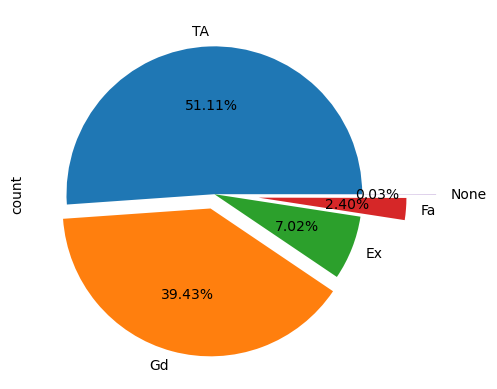

In [91]:
df['KitchenQual'].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.1,0,.3,.5]);

In [92]:
df['KitchenQual']=df['KitchenQual'].replace(['Ex','Gd','TA','Fa','None'],[5,4,3,2,0])

#### <font color=#2da6f7> Exterior1st ile İlgileniyoruz

In [94]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [95]:
df['Exterior1st']=df['Exterior1st'].fillna('None')

#### <font color=#2da6f7> Exterior2nd ile İlgileniyoruz

In [97]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

In [98]:
df['Exterior2nd']=df['Exterior2nd'].fillna('None')

#### <font color=#2da6f7> Electrical ile İlgileniyoruz

In [100]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [101]:
df['Electrical']=df['Electrical'].fillna('None')

In [102]:
df['Electrical']=df['Electrical'].replace(['FuseF','FuseA','FuseP','SBrkr','Mix','None'],[5,4,3,2,1,0])

#### <font color=#2da6f7> GarageCars ile İlgileniyoruz

In [104]:
df['GarageCars'].value_counts()

GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64

In [105]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())

#### <font color=#2da6f7> GarageArea ile İlgileniyoruz

In [107]:
df['GarageArea'].value_counts()

GarageArea
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
528.0      65
400.0      58
480.0      54
264.0      51
288.0      50
308.0      48
280.0      30
420.0      29
336.0      29
672.0      23
462.0      23
216.0      23
384.0      21
504.0      21
506.0      21
286.0      20
312.0      19
624.0      17
525.0      17
352.0      17
495.0      17
550.0      17
360.0      16
180.0      16
564.0      16
300.0      16
572.0      15
460.0      14
588.0      14
660.0      14
390.0      14
540.0      14
478.0      14
520.0      13
539.0      12
297.0      12
720.0      11
252.0      11
432.0      11
472.0      11
200.0      11
470.0      11
502.0      10
294.0      10
450.0      10
461.0      10
530.0       9
482.0       9
434.0       9
578.0       9
473.0       9
542.0       9
492.0       9
529.0       9
441.0       9
490.0       9
396.0       9
474.0       9
270.0       9
552.0       8
648.0       8
527.0       8
430.0       8
431.0       8
299.0       8
451.0    

In [108]:
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

#### <font color=#2da6f7> LandContour ile İlgileniyoruz

In [110]:
df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [111]:
df['LandContour']=df['LandContour'].replace(['Bnk','Lvl','Low','HLS'],[4,3,2,1])

#### <font color=#2da6f7> Street ile İlgileniyoruz

In [113]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [114]:
df['Street']=df['Street'].replace(['Pave', 'Grvl'],[2,1])

#### <font color=#2da6f7> PavedDrive ile İlgileniyoruz

In [116]:
df['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [117]:
df['PavedDrive']=df['PavedDrive'].replace(['Y', 'P', 'N'],[3,2,1])

#### <font color=#2da6f7> BldgType ile İlgileniyoruz

In [119]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [120]:
df['BldgType']=df['BldgType'].replace(['Duplex','2fmCon','1Fam','Twnhs','TwnhsE'],[5,4,3,2,1])

#### <font color=#2da6f7> ExterQual ile İlgileniyoruz

In [122]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

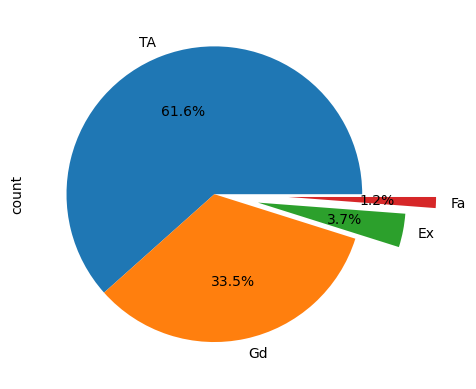

In [123]:
df['ExterQual'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0,.3,.5]);

In [124]:
df['ExterQual']=df['ExterQual'].replace(['Ex','Gd','TA','Fa',],[5,4,3,2])

#### <font color=#2da6f7> ExterCond ile İlgileniyoruz

In [126]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [127]:
df['ExterCond']=df['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#### <font color=#2da6f7> LandSlope ile İlgileniyoruz

In [129]:
df['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [130]:
df['LandSlope']=df['LandSlope'].replace(['Gtl','Mod','Sev'],[3,2,1])

#### <font color=#2da6f7> Heating ile İlgileniyoruz

In [132]:
df['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [133]:
df['Heating']=df['Heating'].replace(['Floor','GasW','GasA','Grav','Wall','OthW'],[6,5,4,3,2,1])

#### <font color=#2da6f7> HeatingQC ile İlgileniyoruz

In [135]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [136]:
df['HeatingQC']=df['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])

#### <font color=#2da6f7> LotConfig ile İlgileniyoruz

In [138]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [139]:
df['LotConfig']=df['LotConfig'].replace(['FR3','FR2','TA','Inside','CulDSac'],[5,4,3,2,1])

#### <font color=#2da6f7> CentralAir ile İlgileniyoruz

In [141]:
df['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [142]:
df['CentralAir']=df['CentralAir'].replace(['Y','N'],[2,1])

#### <font color=#2da6f7> SalePrice ile İlgileniyoruz

In [144]:
df['SalePrice'].mode(),df['SalePrice'].median()

(0    140000.0
 Name: SalePrice, dtype: float64,
 163000.0)

In [145]:
df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].median())

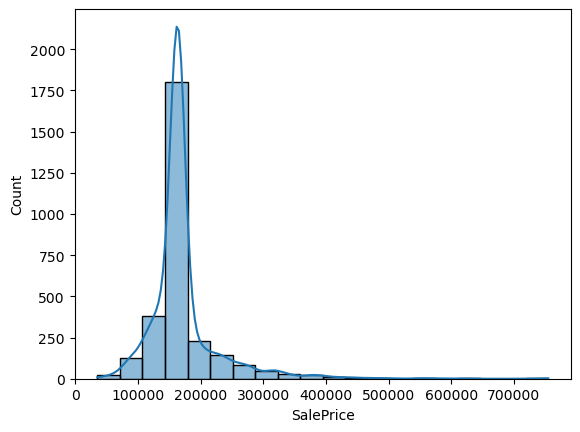

In [146]:
sns.histplot(x=df['SalePrice'],kde=True, bins=20);

In [147]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

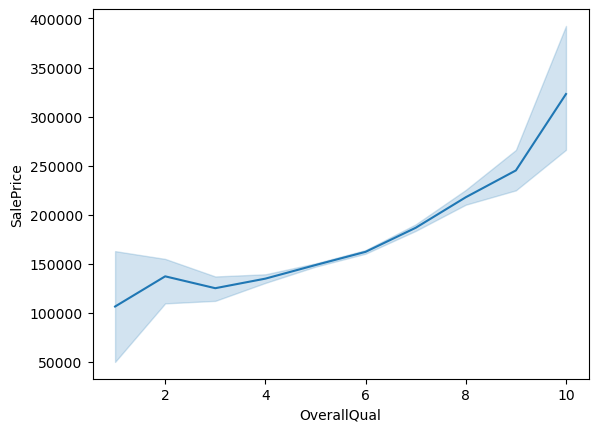

In [148]:
sns.lineplot(x='OverallQual',y='SalePrice',data=df);

In [149]:
df['GrLivArea'].unique()

array([1710, 1262, 1786, ..., 2315,  641, 1778], dtype=int64)

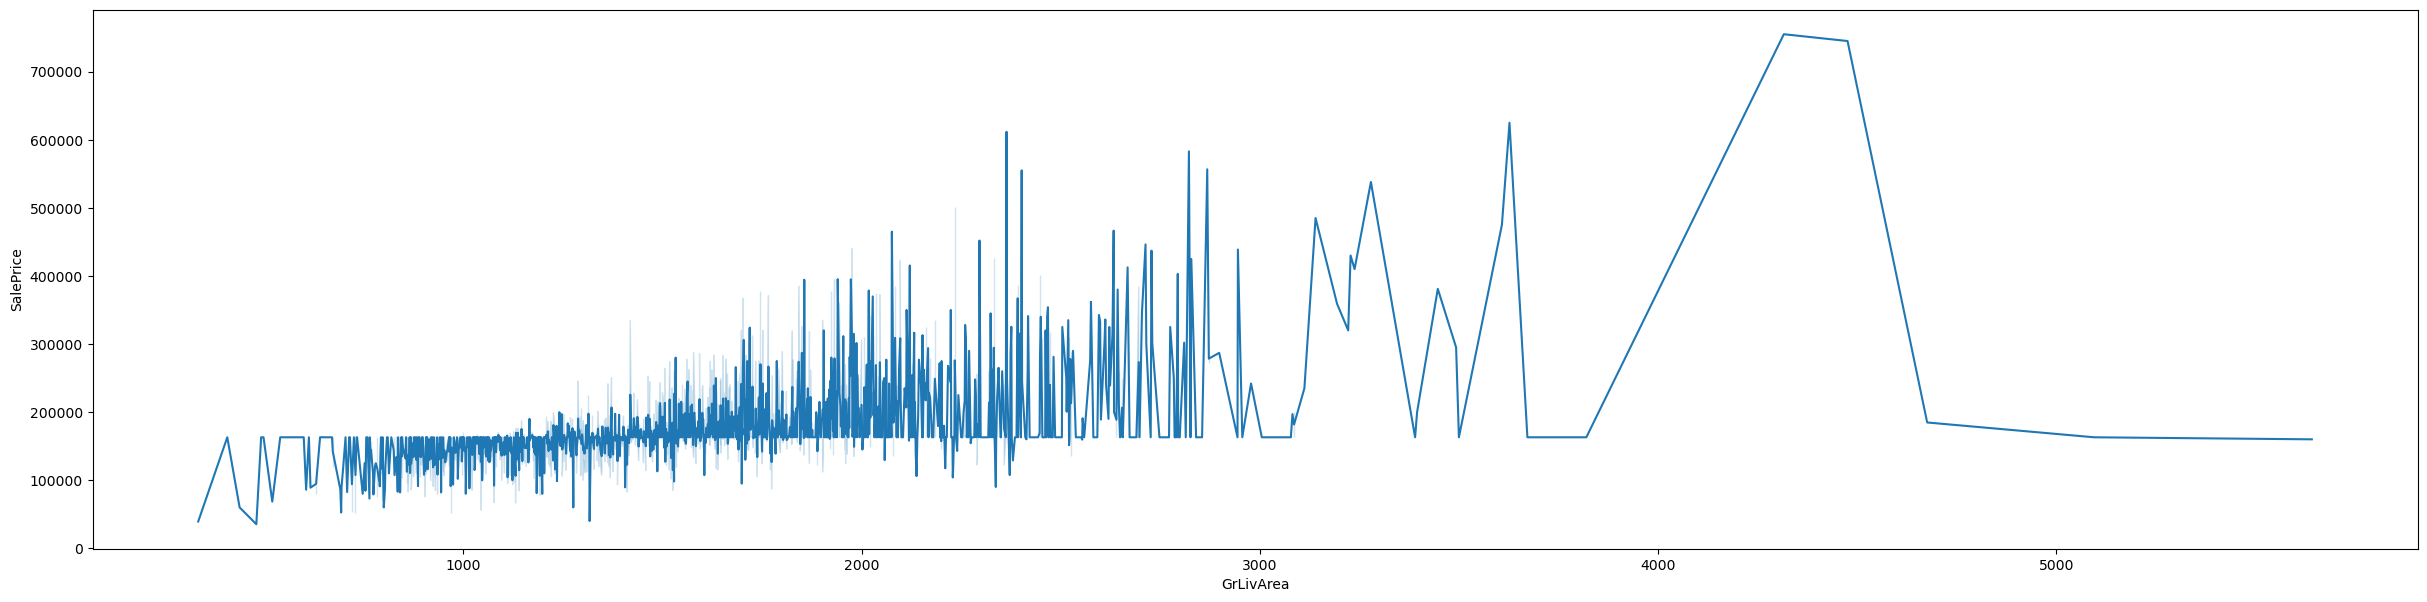

In [150]:
plt.figure(figsize=(30,7))
sns.lineplot(x='GrLivArea',y='SalePrice',data=df);

In [151]:
df.isnull().sum().sort_values(ascending=False)

MSZoning         0
Functional       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
LotFrontage      0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
LotArea          0
Street           0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
TotalBsmtSF 

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LandContour    2919 non-null   int64  
 5   Utilities      2919 non-null   int64  
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   int64  
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   int64  
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  Exterior1st    2919 non-null   object 
 17  Exterior2nd    2919 non-null   object 
 18  MasVnrType   

In [153]:
abs(df.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.542911
GrLivArea        0.518393
ExterQual        0.471508
KitchenQual      0.459981
GarageCars       0.438960
GarageArea       0.432265
TotalBsmtSF      0.428540
1stFlrSF         0.418049
BsmtQual         0.397561
TotRmsAbvGrd     0.392645
FullBath         0.389208
YearBuilt        0.363825
GarageYrBlt      0.360319
YearRemodAdd     0.354414
MasVnrArea       0.336739
Fireplaces       0.329184
HeatingQC        0.298020
MasVnrType       0.290993
LotFrontage      0.246152
LotArea          0.240126
2ndFlrSF         0.230918
WoodDeckSF       0.225070
OpenPorchSF      0.214320
HalfBath         0.199209
GarageQual       0.195145
GarageCond       0.185648
CentralAir       0.174290
Electrical       0.165643
PavedDrive       0.156763
BsmtFullBath     0.155520
MSZoning         0.152896
BsmtCond         0.147088
BedroomAbvGr     0.117662
LandContour      0.101576
KitchenAbvGr     0.096002
EnclosedPorch    0.088223
Functional       0.076711
PoolArea    

In [154]:
df['BedroomAbvGr']=df['BedroomAbvGr']**2
df['BsmtFullBath']=df['BsmtFullBath']**2
df['TotRmsAbvGrd']=df['TotRmsAbvGrd']**2
df['OverallQual']=df['OverallQual']**2 

## <font color=#fa7efc> Modelling

In [156]:
train=df[:1459]
test=df[1459:]

In [157]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [158]:
x=pd.get_dummies(x,drop_first=True)

In [159]:
def algo_test(x,y):
    #Bütün modelleri tanımlıyoruz
    L=LinearRegression()
    R=Ridge()
    LA=Lasso()
    E=ElasticNet()
    ETR=ExtraTreesRegressor()
    GBR=GradientBoostingRegressor()
    DT=DecisionTreeRegressor()
    RF=RandomForestRegressor()
    
    
    algos=[L,R,LA,E,ETR,GBR,DT,RF]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreesRegressor','GradientBoostingRegressor','DecisionTreeRegressor','RandomForestRegressor',]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
    
    r_squared=[]
    rmse=[]
    mae=[]
    
    #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuluyor
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'])
    
    
    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p)**.5)
        mae.append(mean_absolute_error(y_test, p))
    
    
    #result adlı tablo doğruluk ve hata oranlarını yerleştiriyor
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable

In [160]:
algo_test(x,y)

,R_Squared,RMSE,MAE
4,0.903897,22480.518057,15642.198185
5,0.900601,22862.773398,15718.560893
3,0.883808,24718.689867,18542.065315
7,0.882098,24899.898532,16845.910603
1,0.877222,25409.641188,18897.423154
2,0.872261,25917.882994,19164.346737
0,0.871818,25962.772558,19187.216327
6,0.665188,41960.299088,27375.482877


In [203]:
ETR=ExtraTreesRegressor()

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [163]:
model=ETR.fit(x_train,y_train)
tahmin=model.predict(x_test)
mean_squared_error(y_test,tahmin)**.5

22595.059789133193

In [164]:
r2_score(y_test,tahmin)

0.9029151672773101

In [187]:
residuals=tahmin-y_test
residuals

1321     12841.04
836     -15129.25
413       8669.76
522       5139.50
1035     10791.50
614       7906.00
218     -94938.44
1031     58076.79
1289      1630.08
886      -5242.25
576       8965.84
1251     29344.01
1159      7154.15
567       1887.37
1107    -43806.33
852      17190.50
168      22919.16
1101      1205.75
1119     -6285.63
67      -16969.22
1041     -1732.97
453       7755.70
669     -17165.12
1173    -10590.50
192      12427.77
123      21003.17
415       4106.95
277     -40464.50
433      -4856.15
1170    -29366.00
184       2168.86
554     -22884.70
1188    -10626.00
76      -19373.50
905       4793.80
1023     -1364.95
1285     -5572.96
374     -15443.41
1397     -9624.55
259      16028.50
51       15257.00
244      26772.69
1100     22874.76
581     124462.98
678     -27264.49
757       4998.32
1013     23693.87
49        1571.50
591     -29971.78
965      -5044.55
1270    -44997.10
1137     -6130.43
490       5649.00
1335      5489.24
810     -12703.23
141     -3

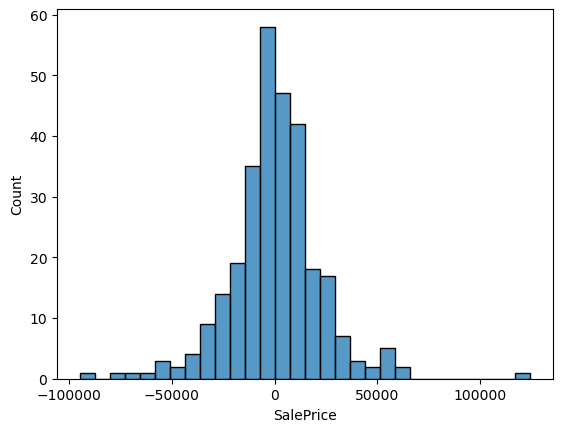

In [201]:
sns.histplot(residuals,bins=30);